In [ ]:
install.packages("dplyr")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
data("diamonds")

In [ ]:
str(diamonds)
head(diamonds)

tibble [53,940 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [ ]:
colSums(is.na(diamonds))

carat     cut   color clarity   depth   table   price       x       y       z 
      0       0       0       0       0       0       0       0       0       0

In [ ]:
sapply(diamonds,class)

$carat
[1] "numeric"

$cut
[1] "ordered" "factor" 

$color
[1] "ordered" "factor" 

$clarity
[1] "ordered" "factor" 

$depth
[1] "numeric"

$table
[1] "numeric"

$price
[1] "integer"

$x
[1] "numeric"

$y
[1] "numeric"

$z
[1] "numeric"

In [ ]:
summary(diamonds$price)
summary(diamonds$carat)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326     950    2401    3933    5324   18823 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2000  0.4000  0.7000  0.7979  1.0400  5.0100 

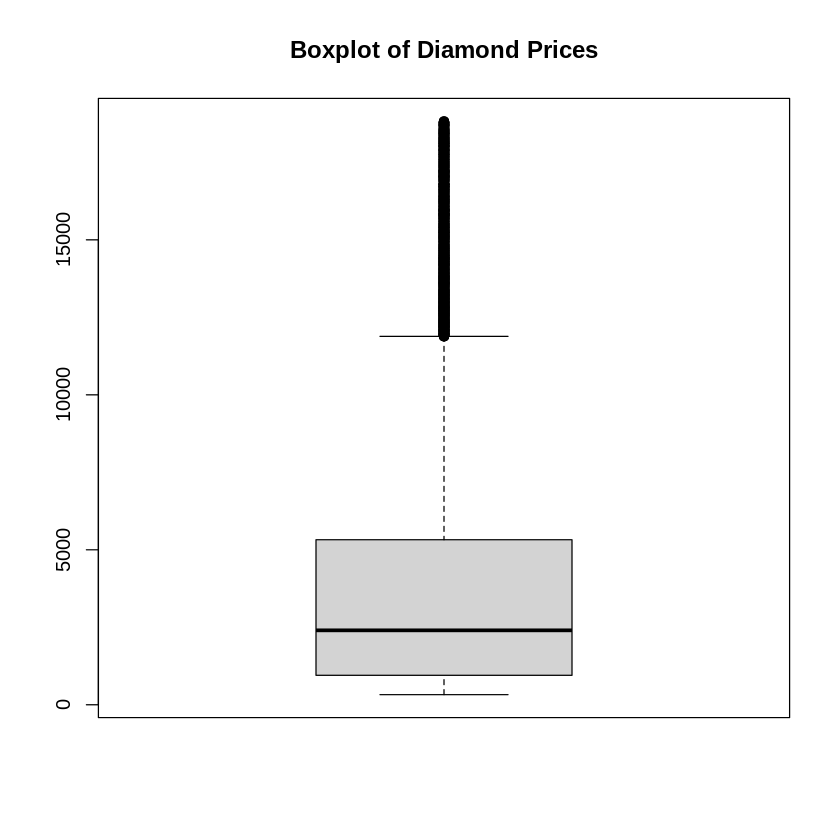

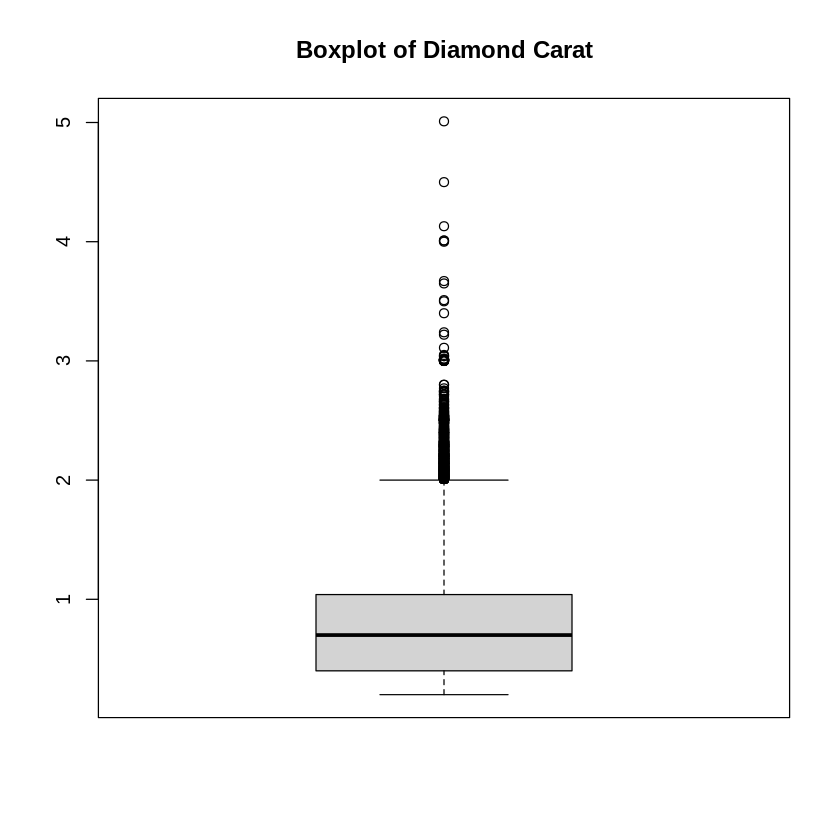

In [ ]:
boxplot(diamonds$price, main="Boxplot of Diamond Prices")
boxplot(diamonds$carat, main="Boxplot of Diamond Carat")

In [ ]:
diamonds <- diamonds %>% filter(price <= 15000, carat <= 3.5)

In [ ]:
sum(duplicated(diamonds))
diamonds <- diamonds %>% distinct()

[1] 138

In [ ]:
avg_price_by_cut <- diamonds %>%
  group_by(cut) %>%
  summarise(avg_price = mean(price, na.rm = TRUE)) %>%
  arrange(desc(avg_price))


In [ ]:
print(avg_price_by_cut)

# A tibble: 5 × 2
  cut       avg_price
  <ord>         <dbl>
1 Premium       4042.
2 Fair          4021.
3 Very Good     3581.
4 Good          3577.
5 Ideal         3125.


In [ ]:
highest_avg_cut <- avg_price_by_cut[1,]

In [ ]:
print(highest_avg_cut)

# A tibble: 1 × 2
  cut     avg_price
  <ord>       <dbl>
1 Premium     4042.


In [ ]:
avg_price_by_carat <- diamonds %>%
  group_by(carat) %>%
  summarise(avg_price = mean(price, na.rm = TRUE))

In [ ]:
print(avg_price_by_carat)

# A tibble: 250 × 2
   carat avg_price
   <dbl>     <dbl>
 1  0.2       365.
 2  0.21      380.
 3  0.22      391.
 4  0.23      486.
 5  0.24      505.
 6  0.25      551.
 7  0.26      551.
 8  0.27      575.
 9  0.28      580.
10  0.29      601.
# ℹ 240 more rows


In [ ]:
avg_price_by_color_clarity <- diamonds %>%
  group_by(color, clarity) %>%
  summarise(avg_price = mean(price, na.rm = TRUE)) %>%
  arrange(desc(avg_price))

`summarise()` has grouped output by 'color'. You can override using the
`.groups` argument.


In [ ]:
print(avg_price_by_color_clarity)

# A tibble: 56 × 3
# Groups:   color [7]
   color clarity avg_price
   <ord> <ord>       <dbl>
 1 I     SI2         6031.
 2 J     SI2         5988.
 3 H     SI2         5151.
 4 J     SI1         4932.
 5 J     VS2         4815.
 6 J     VVS2        4554.
 7 I     VS2         4412.
 8 H     VS2         4376.
 9 I     SI1         4367.
10 H     I1          4328.
# ℹ 46 more rows


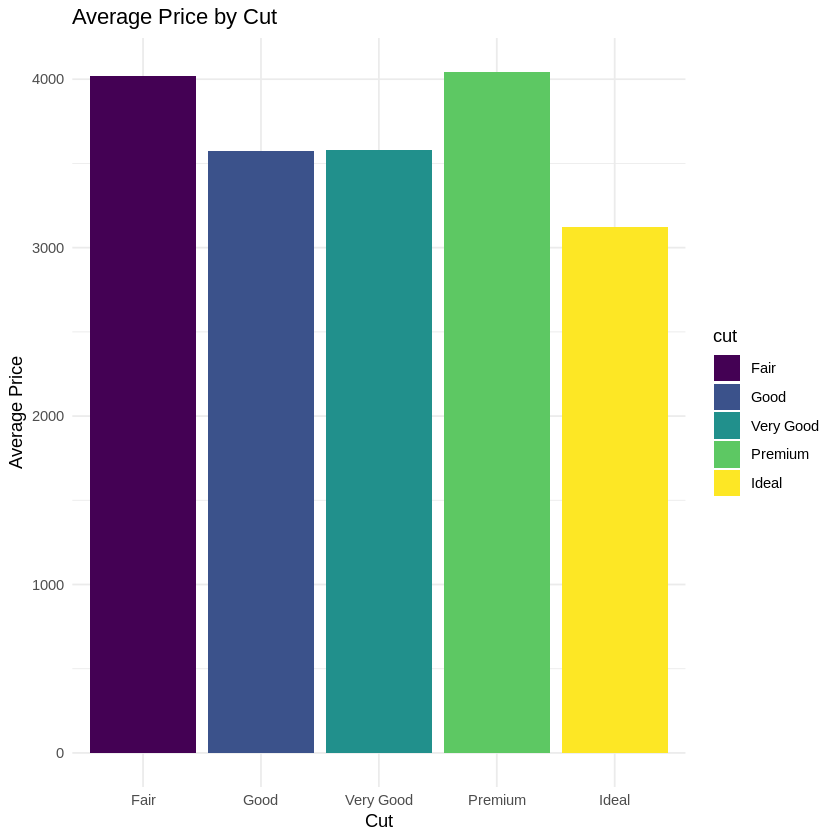

In [ ]:
ggplot(avg_price_by_cut, aes(x=cut, y=avg_price, fill=cut))+
  geom_bar(stat="identity")+
  theme_minimal()+
  labs(title="Average Price by Cut", x="Cut", y="Average Price")

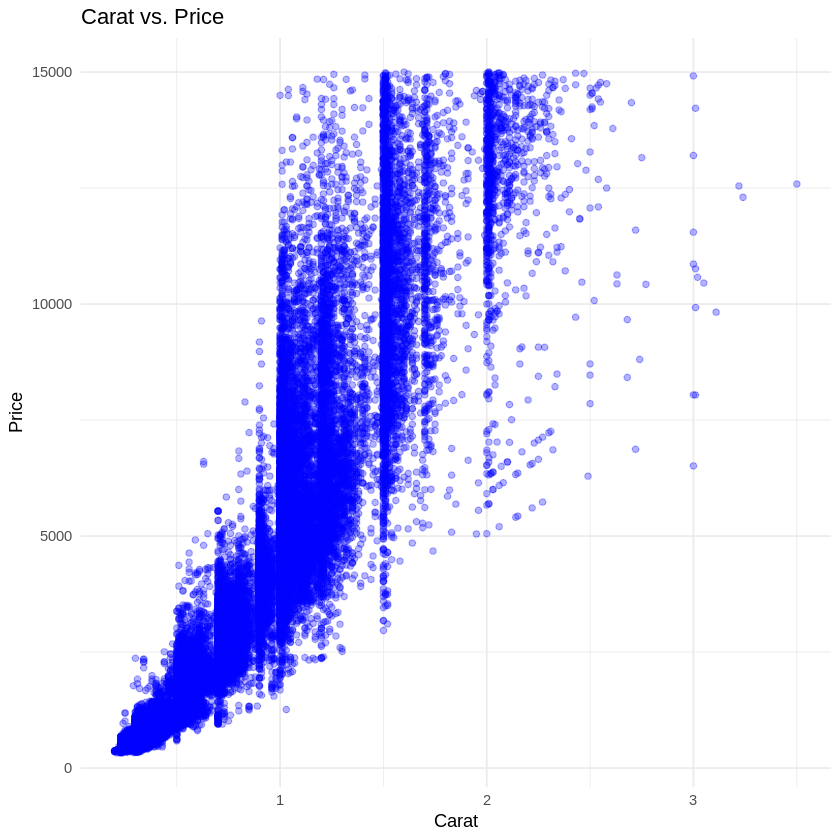

In [ ]:
ggplot(diamonds, aes(x=carat, y=price)) +
    geom_point(alpha=0.3, color="blue") +
    theme_minimal() +
    labs(title="Carat vs. Price", x="Carat", y="Price")

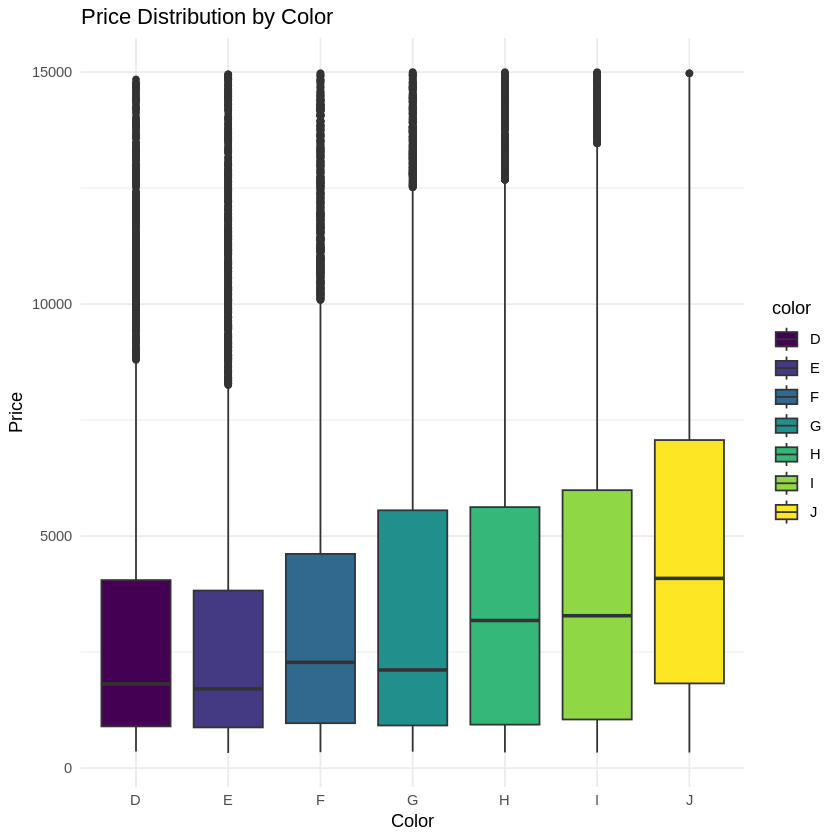

In [ ]:
ggplot(diamonds, aes(x=color, y=price, fill=color)) +
    geom_boxplot() +
    theme_minimal() +
    labs(title="Price Distribution by Color", x="Color", y="Price")